In [202]:
print("Versions of the runtime and packages used for this assignment:")
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import seaborn as sns
print("seaborn version: {}".format(sns.__version__))

print("-------------------------------------------------------")
print("When run on my machine the following versions were used:")
print("Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]")
print("pandas version: 1.5.3")
print("matplotlib version: 3.7.1")
print("NumPy version: 1.24.3")
print("scikit-learn version: 1.3.0")
print("seaborn version: 0.12.2")

Versions of the runtime and packages used for this assignment:
Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.5.3
matplotlib version: 3.7.1
NumPy version: 1.24.3
scikit-learn version: 1.3.1
seaborn version: 0.12.2
-------------------------------------------------------
When run on my machine the following versions were used:
Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.5.3
matplotlib version: 3.7.1
NumPy version: 1.24.3
scikit-learn version: 1.3.0
seaborn version: 0.12.2


In [203]:
from sklearn.utils import Bunch
from functools import reduce

# alternative way to load the data by parsing the dataset into a pandas data frame
# this was appealing because of the ability to encode the categorical features with built in functionality
def load_insurance_data_v2(relative_filepath):
    """
    Parse the insurance dataset into a pandas dataframe and return a Bunch object containing the data

    Parameters:
        relative_filepath (str): the relative file path to the dataset
    Returns:
        sklearn.utils.Bunch: a Bunch object containing the dataset and metadata
    """
    # Parse the data from the file into a dataframe
    dataframe = pd.read_csv(relative_filepath)

    # set of categorical features that need to be encoded into numerical values
    categorical_features = ['sex', 'smoker', 'region']

    def encode_categorical_feature(df, feature_name):
        """
        Given a dataframe and a categorical feature return a new dataframe with the feature encoded to a numerical value

        Parameters:
            df (pandas.DataFrame): the dataframe to encode
            feature_name (str): the name of the categorical feature to encode

        Returns:
            pandas.DataFrame: a new dataframe with the categorical feature encoded to a numerical value
        """
        # create a one dimensional labeled array that contains the encoded feature
        encoded_feature_values = df[feature_name].astype('category').cat.codes
        # create a new dataframe with the encoded feature
        return df.assign(**{feature_name: encoded_feature_values})

    # apply the function named encode_categorical_feature to the dataframe
    # for each categorical feature in the list of features
    # returning a new dataframe with the encoded values
    encoded_dataframe = reduce(
        encode_categorical_feature,
        categorical_features,
        dataframe
    )

    # extract the feature names from the dataframe
    feature_names = encoded_dataframe.head().columns
    description = f'''\
    Insurance dataset
    --------------------

    **Data Set Characteristics:**

        :Number of Instances: 1338
        :Number of Features: 6 (7 including target)
        :Feature Information:
            - age (numeric)
            - sex (male, female)
            - bmi (numeric)
            - children (number of children, numeric)
            - smoker (yes, no)
            - region (southeast, southwest, northeast, northwest)
            - charges (numeric)
    '''
    # extract the target vector from the dataframe
    y = encoded_dataframe['charges']
    # extract the feature matrix from the dataframe
    X = encoded_dataframe.drop(columns='charges')
    # Create a dictionary to store the dataset and its relevant metadata
    bunch_data = {
       'data': X,
       'target': y,
       'feature_names': feature_names,
       'DESCR': description,
       'filename': relative_filepath.split('/')[-1]
    }
    # return a Bunch object containing the data
    return Bunch(**bunch_data)

# load the dataset by parsing the data into a numpy array
def load_insurance_data(relative_filepath):
    number_of_columns = 7;
    first_feature_column_index = 0
    last_feature_column_index = number_of_columns - 1
    first_expression_data_row_index = 1
    # Parse the data from the file
    raw_data = np.genfromtxt(relative_filepath, delimiter=',', dtype=str)
    # Extract the feature names from the first row
    feature_names = raw_data[0]
    # Extract the feature matrix from the remaining rows
    features = raw_data[
        first_expression_data_row_index:,
        first_feature_column_index:last_feature_column_index
   ]
    # Extract the target vector from the last column
    target = raw_data[
        first_expression_data_row_index:,
        last_feature_column_index:number_of_columns
   ]
    # Scrub the data by replacing each human readable value like female with an encoded value like 0
    # using a dictionary to convert friendly values to encoded values
    encoded_value_by_friendly_value = {
        'female': 0,
        'male': 1,
        'yes': 0,
        'no': 1,
        'southeast': 0,
        'southwest': 1,
        'northeast': 2,
        'northwest': 3,
    }
    # anonymous function to map friendly values to encoded values and fallback to the original value if no mapping exists
    encode_categorical_feature = lambda friendly_value: encoded_value_by_friendly_value.get(friendly_value, friendly_value)
    # create a function that will apply the anonymous function to each element in the matrix
    categorical_feature_encoder = np.vectorize(encode_categorical_feature)

    description = f'''\
    Insurance dataset
    --------------------

    **Data Set Characteristics:**

        :Number of Instances: 1338
        :Number of Features: 6 (7 including target)
        :Feature Information:
            - age (numeric)
            - sex (male, female)
            - bmi (numeric)
            - children (number of children, numeric)
            - smoker (yes, no)
            - region (southeast, southwest, northeast, northwest)
            - charges (numeric)
    '''
    bunch_data = {
       'data': categorical_feature_encoder(features).astype(float),
       'target': target.astype(float),
       'feature_names': feature_names,
       'DESCR': description,
       'filename': relative_filepath.split('/')[-1]
    }

    return Bunch(**bunch_data)


In [204]:
relative_filepath = './data/insurance.csv'
# load the dataset by parsing the file at the specified relative filepath
dataset = load_insurance_data_v2(relative_filepath)

print("{}".format(dataset.DESCR))
print("Filename {}".format(dataset.filename))
print("Feature Names {}".format(dataset.feature_names.to_list()))
print("Target Vector {}".format(dataset.target.to_list()))
print("Data Shape {}".format(dataset.data.shape))
dataset.data

    Insurance dataset
    --------------------

    **Data Set Characteristics:**

        :Number of Instances: 1338
        :Number of Features: 6 (7 including target)
        :Feature Information:
            - age (numeric)
            - sex (male, female)
            - bmi (numeric)
            - children (number of children, numeric)
            - smoker (yes, no)
            - region (southeast, southwest, northeast, northwest)
            - charges (numeric)
    
Filename insurance.csv
Feature Names ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Target Vector [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552, 3756.6216, 8240.5896, 7281.5056, 6406.4107, 28923.13692, 2721.3208, 27808.7251, 1826.843, 11090.7178, 39611.7577, 1837.237, 10797.3362, 2395.17155, 10602.385, 36837.467, 13228.84695, 4149.736, 1137.011, 37701.8768, 6203.90175, 14001.1338, 14451.83515, 12268.63225, 2775.19215, 38711.0, 35585.576, 2198.18985, 4687.797, 13770.0979, 51194.55914, 1625.43

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [205]:
# In addition to preprocessing the dataset to encode categorical values into numeric values,
# preprocessing the dataset to handle missing values ensures the dataset is ready for training. 
# Identify if the dataset contains any missing values
print(dataset.data.isnull().sum())
# If there are missing values, a variety of strategies can be applied to handle missing data including:
# - dropping instances with missing values
# - apply imputation to replace missing values with estimated values

# We will choose the simplest approach and omit any instances that contain missing values
dataset.data.dropna()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [206]:
from sklearn.model_selection import train_test_split

# seed to random number generator to make output deterministic when shuffling the dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
seed_to_make_output_deterministic = 0

train_test_split_key_word_arguments = {
    'random_state': seed_to_make_output_deterministic,
    # 25% of the data will be used for testing
    'test_size':0.25,
    # 75% of the data will be used for training
    'train_size':0.75
}

# segregate the entire dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data,
    dataset.target,
    **train_test_split_key_word_arguments
)

In [207]:
print("Training data")

def is_target_feature (feature_name):
    """
    Given a feature name return true if the feature is the target feature, false otherwise

    Parameters:
        feature_name (str): the name of the feature to check

    Returns:
        bool: true if the feature is the target feature, false otherwise
    """
    return feature_name == 'charges'

# set of features that are independent variables and used for prediction
independent_variable_names = [
    feature_name
    for feature_name in dataset.feature_names
    if not is_target_feature(feature_name)
]

# X_train is the matrix of training data that excludes the label column
# Create a dataframe to provide pretty printing of the data
pd.DataFrame(
    data=X_train,
    columns=independent_variable_names
)

Training data


,age,sex,bmi,children,smoker,region
1075,32,0,29.59,1,0,2
131,61,0,22.04,0,0,0
15,19,1,24.60,1,0,3
1223,20,0,24.42,0,1,2
1137,26,0,22.23,0,0,1
...,...,...,...,...,...,...
763,27,1,26.03,0,0,0
835,42,1,35.97,2,0,2
1216,40,1,25.08,0,0,2
559,19,1,35.53,0,0,1


In [208]:
print("Predictions arrived at by the model using Training data")
# y_train is the vector of labels that corresponds to the training data
# Create a dataframe to provide pretty printing of the data
pd.DataFrame(
    data=y_train,
    columns=['charges']
)

Predictions arrived at by the model using Training data


,charges
1075,4562.84210
131,13616.35860
15,1837.23700
1223,26125.67477
1137,3176.28770
...,...
763,3070.80870
835,7160.33030
1216,5415.66120
559,1646.42970


In [209]:
print("Testing data")
# X_test is the matrix of test data that excludes the label column
# Create a dataframe to provide pretty printing of the data
pd.DataFrame(
    data=X_test,
    columns=independent_variable_names
)


Testing data


,age,sex,bmi,children,smoker,region
578,52,1,30.200,1,0,3
610,47,0,29.370,1,0,2
569,48,1,40.565,2,1,1
1034,61,1,38.380,0,0,1
198,51,0,18.050,0,0,1
...,...,...,...,...,...,...
574,57,0,34.295,2,0,0
1174,29,1,32.110,2,0,1
1327,51,1,30.030,1,0,2
817,23,1,37.100,3,0,3


In [210]:
print("Predictions arrived at by the model using Testing data")
# y_test is the vector of labels that corresponds to the testing data
# Create a dataframe to provide pretty printing of the data
pd.DataFrame(
    data=y_test,
    columns=['charges']
)

Predictions arrived at by the model using Testing data


,charges
578,9724.53000
610,8547.69130
569,45702.02235
1034,12950.07120
198,9644.25250
...,...
574,13224.05705
1174,4433.91590
1327,9377.90470
817,3597.59600


In [211]:
# Several times we will want to create separate plots for each feature in the dataset
# This function will create a single plot that leverage subplots for each feature in the dataset
import matplotlib.pyplot as plt

def create_subplots_for_each_feature(function_to_apply_to_each_subplot):
    """
    Function to create a subplot for each feature in the dataset.
    Apply the function named function_to_apply_to_each_subplot
    so we have flexibility to create different types of plots.

    Parameters:
        function_to_apply_to_each_subplot (function): the function to apply to each subplot
    """
    # discrete number of independent variables
    number_of_features = dataset.data.shape[1]

    # Create a 2x3 grid of subplots to display a plot for each feature
    number_of_rows = 2
    number_of_columns = 3

    # Set the size of the figure.
    twenty_inch_by_ten_inch_figure_size = (20, 10)

    # Create a figure, fig, and a set of subplots, axes, arranged in a 2x3 grid
    fig, axes = plt.subplots(
        nrows=number_of_rows,
        ncols=number_of_columns,
        figsize=twenty_inch_by_ten_inch_figure_size
    )

    # create a subplot for each feature and apply the function named function_to_apply_to_each_subplot
    # to allow the consumer of this function to create different types of plots
    for feature_index in range(number_of_features):
        # Index of the row in the 2x3 grid
        row = feature_index // number_of_columns
        # Index of the column in the 2x3 grid
        column = feature_index % number_of_columns
        # Position of the subplot in the 2x3 grid
        position_within_subplot_grid = (row, column)
        # obtain a subplot at the specified position
        subplot = axes[position_within_subplot_grid]

        function_to_apply_to_each_subplot(subplot, feature_index)

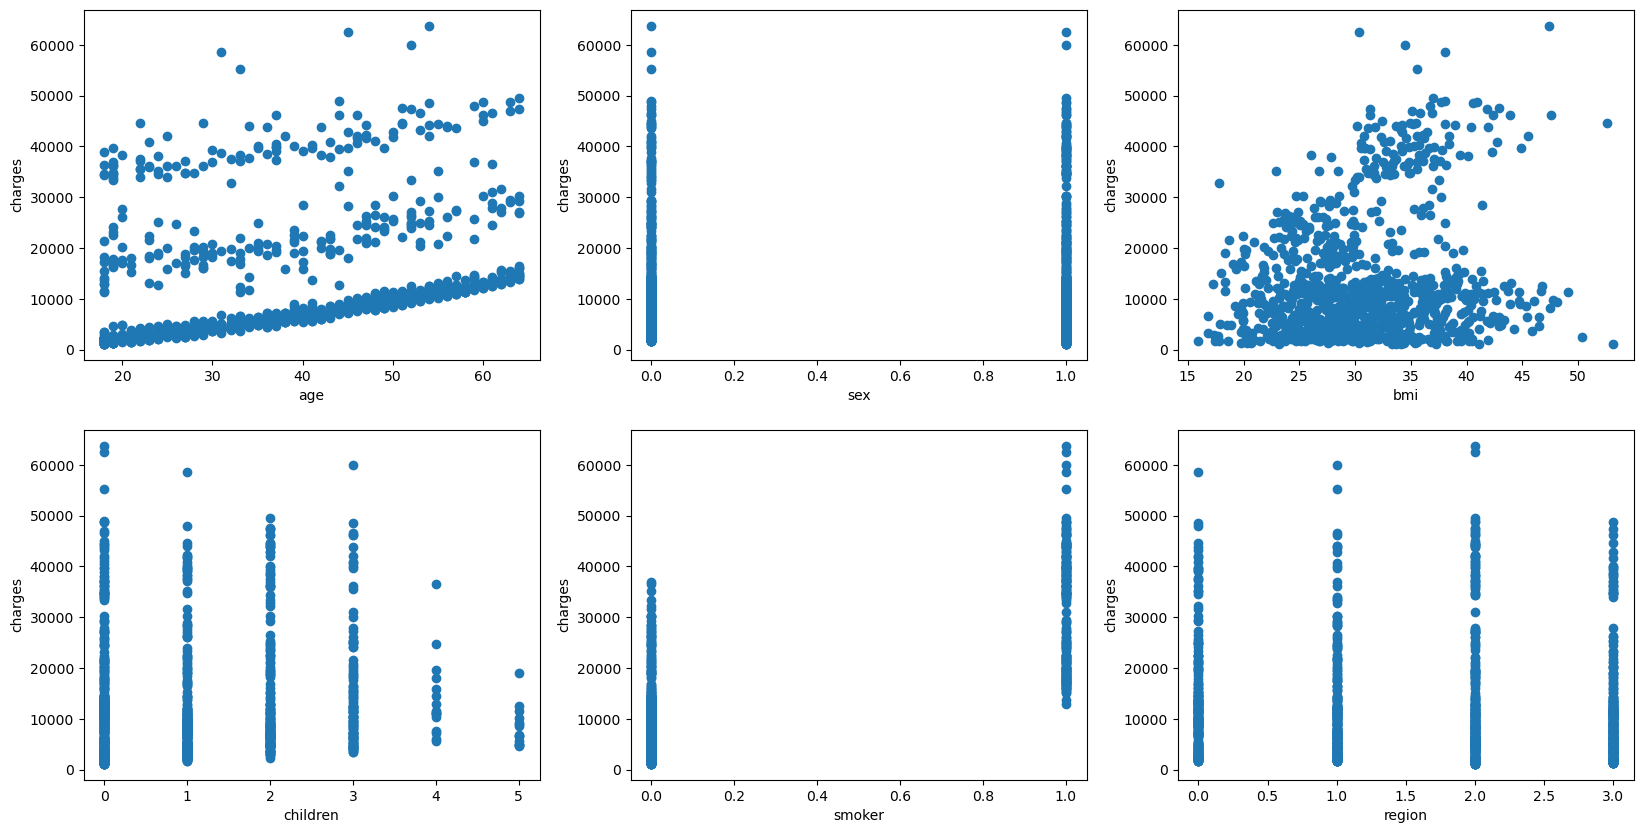

In [212]:

# Prior to applying regression technique to the dataset
# we can visualize the relationships between each feature and the target feature
# to determine if there are any obvious relationships between a feature and the target feature.
# Observing no correlation between a feature and the target feature
# may indicate the feature is not useful for prediction, however we will also use statistical techniques to verify.

# Use circles to represent the data points.
marker_shape = 'o'
# Do not connect the data points with a line.
no_line = 'None'

def create_scatter_plot_per_feature(subplot, feature_index):
    """
    Create a scatter plot of the feature against the target feature.

    Parameters:
        subplot (matplotlib.axes._subplots.AxesSubplot): the subplot to create the scatter plot on
        feature_index (int): the index of the feature
    """
    # name of the feature at the current index
    feature_name = dataset.feature_names[feature_index]
    # vector of values for the feature at the current index
    feature_vector = X_train[feature_name]
     # plot the feature values against the target values
    subplot.plot(
        feature_vector,
        y_train,
        marker=marker_shape,
        linestyle=no_line
    )
    subplot.set_xlabel(feature_name)
    subplot.set_ylabel('charges')

create_subplots_for_each_feature(create_scatter_plot_per_feature)
plt.show()

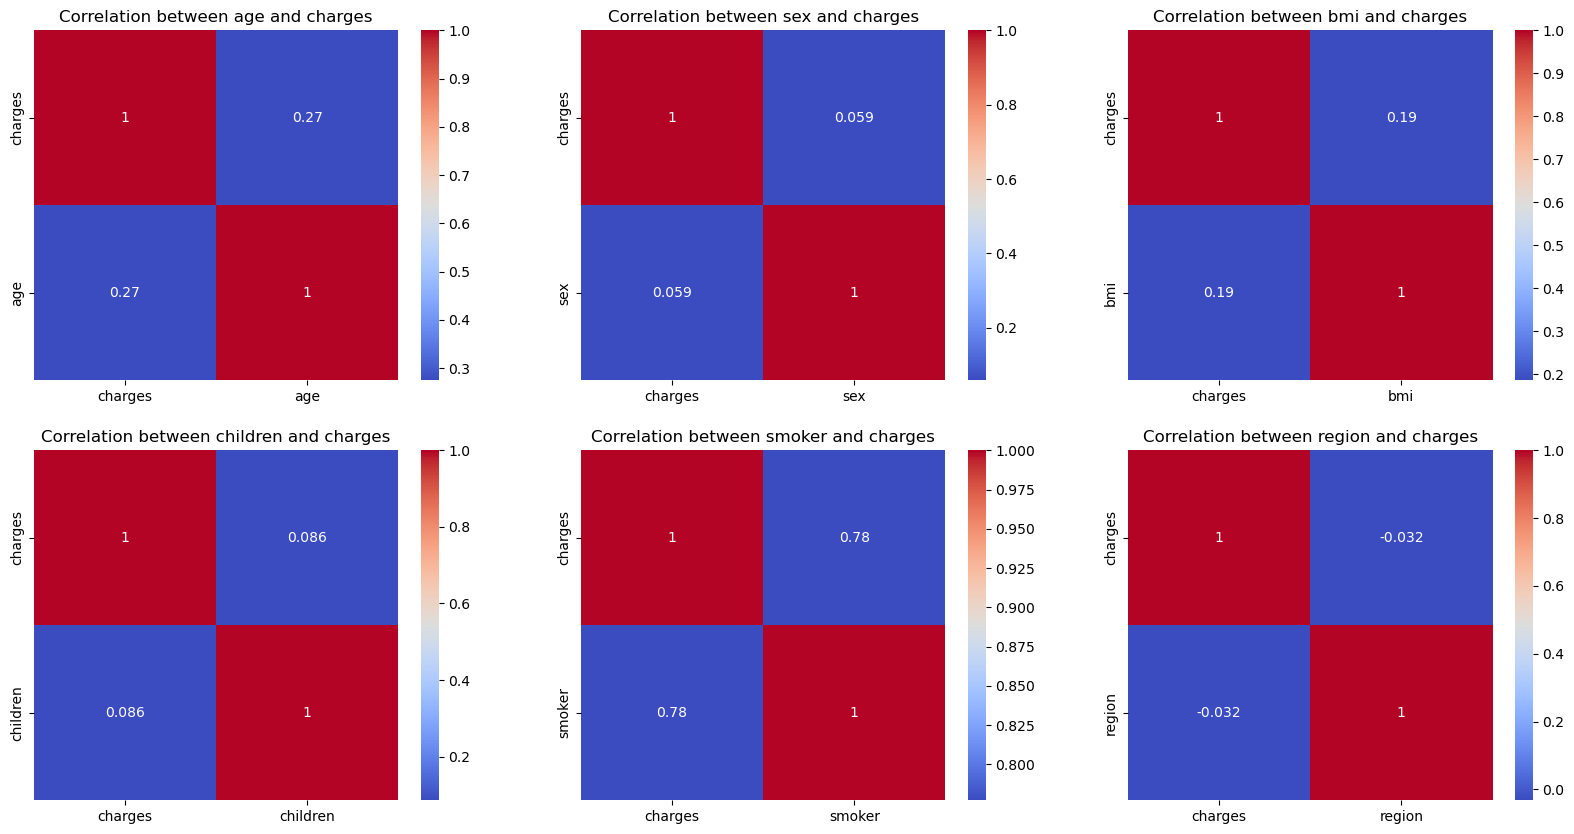

In [213]:
import seaborn as sns
# In addition to scatter plots to visualize the relationship between each feature and the target feature,
# we can use a correlation matrix to visualize the relationship between each feature and the target feature.
# Observing a correlation between each feature and the target feature may indicate multiple linear regression is suitable.
# A correlation matrix is a square matrix that shows the correlation coefficients between a features.
# The correlation coefficient is a value between -1 and 1 that indicates the strength and direction of the relationship.
# A correlation coefficient of 1 indicates a strong positive relationship.
# A correlation coefficient of -1 indicates a strong negative relationship.
# A correlation coefficient of 0 indicates no relationship.
# Generally, an absolute value of 0.7 or greater indicates a strong relationship.
# The diagonal of the correlation matrix will be 1 because each feature is precisely correlated with itself.

# Improve the readability of the correlation matrix with the use a heatmap.
# The strength of the relationship between each feature and the target feature will be indicated by a color gradient.

# Visually include the correlation coefficient in each cell of the correlation matrix
include_correlation_coefficient_in_each_cell = True

# coolwarm is a color map that indicates the strength of the relationship between each feature and the target feature
# using a color gradient from blue to red.
color_map = 'coolwarm'

def create_heatmap_per_feature(subplot, feature_index):
    """
    Create a correlation matrix of the feature against the target feature.
    Use the correlation matrix to create a heatmap to visualize the relationship.

    Parameters:
        subplot (matplotlib.axes._subplots.AxesSubplot): the subplot to create the correlation matrix on
        feature_index (int): the index of the feature
    """
    # name of the feature at the current index
    feature_name = dataset.feature_names[feature_index]
    # vector of values for the feature at the current index
    feature_vector = X_train[feature_name]
    # preserve the number of rows when concatenating the target feature vector to the feature vector
    # and combine the columns into a single matrix
    concat_columns_horizontally = 1
    # Create a 2x2 matrix that includes a feature and the target feature
    X_feature_matrix = pd.concat(
        [y_train, feature_vector],
        axis=concat_columns_horizontally
    )
    # Create a 2x2 correlation matrix
    correlation_matrix = X_feature_matrix.corr()
    # Create a heatmap to visualize the correlation matrix
    sns.heatmap(
        correlation_matrix,
        annot=include_correlation_coefficient_in_each_cell,
        cmap=color_map,
        ax=subplot,
    )
    # Set the title of the subplot
    subplot.set_title(f'Correlation between {feature_name} and charges')

create_subplots_for_each_feature(create_heatmap_per_feature)


In [214]:
# Declare helper functions to format floats to 2 decimal places

# anonymous function to format the data to 2 decimal places
withFormatter = lambda x: "{:.2f}".format(x);
# create a function that will apply the anonymous function to each element in the matrix
float_formatter = np.vectorize(withFormatter)

In [215]:
from sklearn.linear_model import LinearRegression
# construct a multiple linear regression model.
# Since the data set contains more than two features we will use multiple linear regression
# that uses ordinary least squares to fit the model to the training data
regressor = LinearRegression()
# fit the model to the training data
regressor.fit(X_train, y_train)

LinearRegression()

In [216]:
# We constructed an instance of a LinearRegression model providing the default constructor arguments.
# However the parameters, fit_intercept and positive, can be set to True or False to change the behavior of the model.
# We can use a technique called hyperparameter tuning to determine the optimal values for the parameters.
# Specifically we will use a grid search algorithm to find the optimal values for the parameters.

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# The GridSearchCV algorithm we will use requires a Pipeline object
# Pipelines create a sequence of steps that can be cross-validated together.

# Name of the first step in the pipeline
step_name = 'regressor'
# Every step of the pipeline prior to the last step requires an object that implements the interface fit/transform
# The last step requires an object that implements the interface fit and is referred to as an estimator.
estimator = LinearRegression()

# The parameters of each step can be set by combining the step name, the first element of the tuple
# name of the parameter supplied to the second element of the tuple with two underscores in between.
# For example, LinearRegression accepts the parameter named fit_intercept,
# therefore we can set the value of fit_intercept with regressor__fit_intercept.
pipeline_sequential_steps = [
    (step_name, estimator)
]
# construct an instance of a Pipeline object
pipeline = Pipeline(pipeline_sequential_steps)

# Calculate the intercept of the model if True, assume the intercept at the origin otherwise
# Typically set to false when you have prior knowledge that the line should pass through the origin
fit_intercept_parameter_name = 'regressor__fit_intercept'

# Constrain the coefficients to be non-negative if True, otherwise no constraints are imposed
positive_parameter_name = 'regressor__positive'

# Define the hyperparameters to tune such that
# the keys of the dictionary are the names of the arguments to the constructor of the model
# and the values of the dictionary are lists of values to try for a particular hyperparameter.
hyper_parameter_grid = {
    fit_intercept_parameter_name: [True, False],
    positive_parameter_name: [True, False],
}

# Apply a cross validation technique used evaluate the model on a limited dataset
# Divide the data set into k equal subsets and use k-1 subsets to train the model and the remaining subset to test the model
# This method is known as k-fold cross-validation because the subsets are referred to as folds and k refers to the number of folds
five_fold_cross_validation = 5

# Create a grid search object with 5-fold cross-validation
# The grid search object represents the combinations of hyperparameters in a grid and will try every combination of hyperparameters
# searching for the combination of hyperparameters that results in the best model
grid_search = GridSearchCV(
    pipeline,
    hyper_parameter_grid,
    cv=five_fold_cross_validation
)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# In this case the calculating the intercept
# and not constraining the coefficients, the default behavior, is optimal.
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'regressor__fit_intercept': True, 'regressor__positive': False}


In [217]:
# Now that we have determined the optimal hyperparameters
# we can construct a new instance of a LinearRegression model with the optimal hyperparameters

# view object that enables enumerating the key values pairs of the dictionary
best_parameters_key_value_pairs = grid_search.best_params_.items()

def trim_prefix(hyperparameter_name):
    """
    Remove the prefix 'regressor__' from the hyperparameter name
    so it can be applied to the regressor object directly.

    Parameters:
        hyperparameter_name (str): the name of the grid search hyperparameter

    Returns:
        str: the name of the regressor hyperparameter
    """
    return hyperparameter_name.replace('regressor__', '')

# construct a new dictionary with the optimized parameters by
# removing the prefix 'regressor__' from each parameter name
# of the best_params dictionary returned by the grid search
optimal_parameters = {
    trim_prefix(key) : value for key, value in best_parameters_key_value_pairs
}

# construct a multiple linear regression model with tuned parameters.
regressor = LinearRegression(**optimal_parameters)
# fit the model to the training data
regressor.fit(X_train, y_train)

LinearRegression()

In [218]:
# vector of predictions arrived at by the model
y_pred = regressor.predict(X_test)

# General formula for multiple linear regression
# y = m1*x1 + m2*x2 + ... + mn*xn + c
# Also seen as
# h = θ1*x1 + θ2*x2 + ... + θn*xn + θ0

# value of prediction when all features are zero
c = regressor.intercept_
print("y_intercept: {}".format(c))

# m1, m2, ..., mn
# coefficients for each feature which represent the impact or weight of each feature on the target feature
coefficients = regressor.coef_
print("coefficients per feature: {}".format(float_formatter(coefficients)))

y_intercept: -11261.138825163971
coefficients per feature: ['250.54' '3.65' '322.88' '450.15' '23602.12' '-341.24']


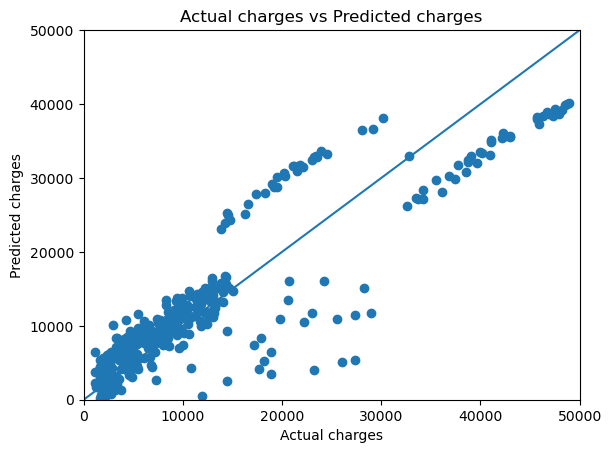

In [219]:
import matplotlib.pyplot as plt

# arbitrary limit for the x and y axis at least as large as the largest value in the dataset
x_axis_limit = y_axis_limit = 50000

# visualize how good the predictions are compared to the actual values for the training data
# Observing a linear relationship between the actual values and the predicted values indicates the model is suitable.
plt.scatter(
    y_test,
    y_pred,
)
# (x1, y1) and (x2, y2) are the endpoints of the identity line
x1 = 0
y1 = 0
x2 = x_axis_limit
y2 = y_axis_limit

# plot the identity line to compare the actual values to the predicted values
# Note this **is not the regression line** and is only used to compare the actual values to the predicted values
plt.plot(
    [x1, x2],
    [y1, y2]
)

# range of the x and y axis
x_axis_range = [0, x_axis_limit]
y_axis_range = [0, y_axis_limit]

# scale the x and y axis to the same range
# to ensure the identity line is not distorted
plt.xlim(x_axis_range)
plt.ylim(y_axis_range)

plt.title("Actual charges vs Predicted charges")
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.show()

In [220]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
from sklearn.metrics import r2_score
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html
from sklearn.feature_selection import f_regression

# compute the R² score
# How close the data fits to the regression line
r = r2_score(y_test, y_pred)
print("R2 score: {:.4f}".format(r))
print('R2 score: {:.4f}'.format(regressor.score(X_test,y_test)))

# compute the f statistic and p-values
f_statistic, p_values = f_regression(X_test, y_pred)
print("Features             : {}".format(dataset.feature_names.to_list()))
print("Formatted F statistic: {}".format(float_formatter(f_statistic)))
print("Formatted p-values   : {}".format(float_formatter(p_values)))

R2 score: 0.7963
R2 score: 0.7963
Features             : ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Formatted F statistic: ['60.68' '2.35' '22.57' '0.01' '1960.21' '2.43']
Formatted p-values   : ['0.00' '0.13' '0.00' '0.93' '0.00' '0.12']


In [221]:
# use alternative method of calculating metrics in order to compare results
import statsmodels.api as sm

def get_performance_results(X_feature_matrix, y_target_vector):
    """
    Parameters:
        X_feature_matrix (pandas.core.frame.DataFrame): the matrix of feature values.
        y_target_vector (pandas.core.series.Series): the vector of target values.

    Returns:
        RegressorResultsWrapper: the performance results of a linear model.
    """
    # Add a column vector with constant value 1 to the feature matrix to represent the intercept term.
    # The constant term represents the expected value of the target feature when all of the feature values are zero.
    X_with_constant_term = sm.add_constant(X_feature_matrix)
    # construct an instance of a linear model
    ordinary_least_squares_model = sm.OLS(
        y_target_vector,
        X_with_constant_term
    )
    # fit the model to the training data
    regression_results = ordinary_least_squares_model.fit()
    # return a performance results
    return regression_results

results = get_performance_results(X_test, y_test)

# Print the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 22 Sep 2023   Prob (F-statistic):          4.83e-111
Time:                        21:24:07   Log-Likelihood:                -3368.1
No. Observations:                 335   AIC:                             6750.
Df Residuals:                     328   BIC:                             6777.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.366e+04   1879.886     -7.265      0.0

In [222]:
# Now that we have the performance of model we can attempt to improve the model with a few techniques.
# In order to compare the results of each model we keep track of the R² score and the F statistic.
# The R² score indicates how close the data fits to the regression line.
# The F statistic indicates the strength of the relationship between the independent variables and the dependent variable.

# Create a dictionary to store the performance metrics of each model
performance_metrics = {}

def record_performance(optimization_technique_name, regression_results_wrapper, description):
    """
    Add the performance metrics of the model to the dictionary
    keyed by the optimization technique name so we can compare the results of each model.

    Parameters:
        optimization_technique_name (str): short name of the optimization technique
        regression_results_wrapper (statsmodels.regression.linear_model.RegressionResultsWrapper): the performance results of a linear model.
        description (str): description of the optimization technique
    """
    performance_metrics[optimization_technique_name] = {
        'r_squared': regression_results_wrapper.rsquared,
        'adjusted_r_squared': regression_results_wrapper.rsquared_adj,
        'f_statistic': regression_results_wrapper.fvalue,
        'description': description
    }

record_performance('no_optimizations', results, "no-op hyperparameter tuning of linear regressor")

body mass index ranges from 15.96 to 53.13
sex ranges from 0 or 1


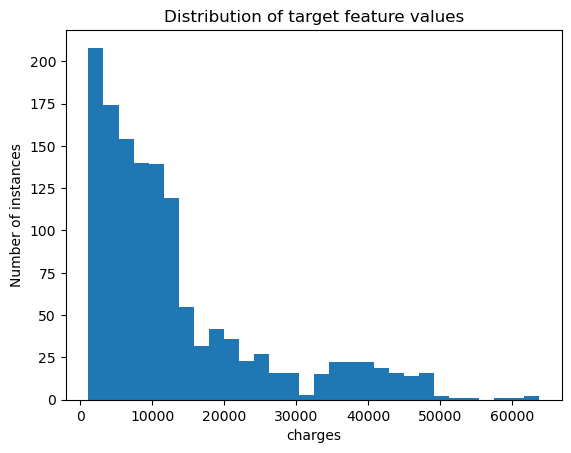

Is target feature normally distributed: False


In [223]:
from scipy.stats import anderson
# We preprocessed the dataset to handle missing values and encode categorical features into numeric values
# Another form of preprocessing called feature scaling may be beneficial if some features have a larger range of values than others
print(f'body mass index ranges from {np.min(dataset.data["bmi"])} to {np.max(dataset.data["bmi"])}')
print(f'sex ranges from {np.min(dataset.data["sex"])} or {np.max(dataset.data["sex"])}')
# Note the range of values for body mass index are larger than the range of values for sex

# Linear regression algorithm will be biased towards features with larger values
# To avoid this issue we can scale the features to have a similar range of values with normalization

# Prior to normalization we will look at the distribution of the target feature values.
# We will use a histogram to visualize the distribution.

# number of intervals to divide the data into
number_of_intervals = 30

plt.hist(
    dataset.target,
    bins=number_of_intervals
)
plt.xlabel("charges")
plt.ylabel('Number of instances')
plt.title('Distribution of target feature values')
plt.show()

# We can also use a statistical test to determine if the target feature follows a Gaussian distribution

# The type of distribution we want to determine if the data follows
gaussian_distribution = 'norm'
# Anderson-Darling test that determines if the data follows a specific distribution
result = anderson(
    dataset.target,
    dist=gaussian_distribution
)
# Critical values for various significance levels are stored in the array critical_values
# critical values for the test at the 1%, 5% and 10% significance levels correspond to the indexes 0, 1, and 2 respectively
five_percent_significance_level_index = 2
# reject the null hypothesis, the data is normally distributed, if the statistic is greater than the critical value
is_normally_distributed = result.statistic <= result.critical_values[five_percent_significance_level_index]

print(f'Is target feature normally distributed: {is_normally_distributed}')

In [224]:
# Since there is not a normal distribution, we will use RobustScaler to normalize
from sklearn.preprocessing import RobustScaler
# construct a scaler object
scaler = RobustScaler()
# fit the scaler object to the training data
# this will compute the mean and standard deviation for each feature
X_train_scaled = scaler.fit_transform(X_train)
# apply the scaler object to the test data
X_test_scaled = scaler.transform(X_test)

# construct a linear regression model
regressor = LinearRegression()
# fit the model to the training data
regressor.fit(X_train_scaled, y_train)
# vector of predictions arrived at by the model
y_pred = regressor.predict(X_test_scaled)

results = get_performance_results(X_test, y_test)
record_performance('normalization', results, "Robust scalar to scale the features to have similar ranges of values so features with larger ranges we're not biased towards. Non-guasisan distribution so used RobustScaler instead of StandardScaler.")
print(results.summary())
# scaling the features did not improve the R² score

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 22 Sep 2023   Prob (F-statistic):          4.83e-111
Time:                        21:24:07   Log-Likelihood:                -3368.1
No. Observations:                 335   AIC:                             6750.
Df Residuals:                     328   BIC:                             6777.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.366e+04   1879.886     -7.265      0.0

In [225]:
# Attempt to improve the model by imposing a penalty on the number of coefficients
# This will reduce the impact of features that are not useful for prediction
from sklearn.linear_model import Ridge
# construct a ridge regression model
regressor_with_l2_regularization = Ridge()
# fit the model to the training data
regressor_with_l2_regularization.fit(X_train, y_train)
# vector of predictions arrived at by the model
y_pred = regressor_with_l2_regularization.predict(X_test)

results = get_performance_results(X_test, y_test)
print(results.summary())

record_performance('regularization', results, "Impose a penalty on the number of coefficients to reduce the impact of features that are not useful for prediction. Used Ridge regressor with L2 regularization.")
# penalty terms did not improve the Adjusted R² score

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 22 Sep 2023   Prob (F-statistic):          4.83e-111
Time:                        21:24:07   Log-Likelihood:                -3368.1
No. Observations:                 335   AIC:                             6750.
Df Residuals:                     328   BIC:                             6777.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.366e+04   1879.886     -7.265      0.0

In [226]:
# Attempt to perform hyperparamter tuning to find the optimal values for the parameters of the Ridge regressor

# Name of the first step in the pipeline
step_name = 'regressor'
# Every step of the pipeline prior to the last step requires an object that implements the interface fit/transform
# The last step requires an object that implements the interface fit and is referred to as an estimator.
estimator = Ridge()

# The parameters of each step can be set by combining the step name, the first element of the tuple
# name of the parameter supplied to the second element of the tuple with two underscores in between.
# For example, LinearRegression accepts the parameter named fit_intercept,
# therefore we can set the value of fit_intercept with regressor__fit_intercept.
pipeline_sequential_steps = [
    (step_name, estimator)
]
# construct an instance of a Pipeline object
pipeline = Pipeline(pipeline_sequential_steps)

# Calculate the intercept of the model if True, assume the intercept at the origin otherwise
# Typically set to false when you have prior knowledge that the line should pass through the origin
fit_intercept_parameter_name = 'regressor__fit_intercept'

# Any positive value that controls the strength of the L2 regularization penalty
alpha_parameter_name = 'regressor__alpha'

# The default value for alpha is 1.0
default_alpha = 1.0

# Make a guess at the range of values for alpha, using the logarithmic scale to increase the range of values
logarithmic_alpha_range = [0.001, 0.01, 0.1, default_alpha, 10, 100, 1000]

# Define the hyperparameters to tune such that
# the keys of the dictionary are the names of the arguments to the constructor of the model
# and the values of the dictionary are lists of values to try for a particular hyperparameter.
hyper_parameter_grid = {
    fit_intercept_parameter_name: [True, False],
    alpha_parameter_name: logarithmic_alpha_range,
}

# Apply a cross validation technique used evaluate the model on a limited dataset
# Divide the data set into k equal subsets and use k-1 subsets to train the model and the remaining subset to test the model
# This method is known as k-fold cross-validation because the subsets are referred to as folds and k refers to the number of folds
five_fold_cross_validation = 5

# Create a grid search object with 5-fold cross-validation
grid_search = GridSearchCV(
    pipeline,
    hyper_parameter_grid,
    cv=five_fold_cross_validation
)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# In this case the calculating the intercept
# and using an alpha value of 1.0, the default behavior, is optimal.
print("Best hyperparameters: ", grid_search.best_params_)

# Since the default values are optimal and would be redundant, we can record the results of the previous Ridge regressor
record_performance('tuning_l2_reg', results, "no-op hyperparameter tuning of the strength of the L2 regularization penalty")

Best hyperparameters:  {'regressor__alpha': 1.0, 'regressor__fit_intercept': True}


In [227]:
# Attempt to improve the model by excluding insignificant features

# set of features that are insignificant based on p-values in previous analysis
insignificant_features = ['region', 'sex']

# indices of the significant features used to slice the feature matrix
indices_of_significant_features = [
    index
    for index, feature_name in enumerate(independent_variable_names)
    if feature_name not in insignificant_features
]
# feature matrix that excludes insignificant features by providing a list of indices to slice the feature matrix
# iloc, short for integer location, is used to select columns of the dataframe by index
X_feature_matrix_excluding_insignificant_features = dataset.data.iloc[:, indices_of_significant_features]

# segregate the entire dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_feature_matrix_excluding_insignificant_features,
    dataset.target,
    **train_test_split_key_word_arguments
)

# construct a linear regression model
regressor = LinearRegression()
# fit the model to the training data
regressor.fit(X_train, y_train)
# vector of predictions arrived at by the model
y_pred = regressor.predict(X_test)

results = get_performance_results(X_test, y_test)
# Print the summary of the model
print(results.summary())

record_performance('feature_selection', results, "Excluded insignificant features sex and region")
# excluding insignificant features did not improve the Adjusted R² score

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     324.0
Date:                Fri, 22 Sep 2023   Prob (F-statistic):          6.83e-113
Time:                        21:24:08   Log-Likelihood:                -3369.7
No. Observations:                 335   AIC:                             6749.
Df Residuals:                     330   BIC:                             6768.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.384e+04   1870.780     -7.400      0.0

In [228]:
# Another modification to feature selection could be motivated by the presence of multicollinearity
# which is when two independent variables are highly correlated.
# If we find multicollinearity in the dataset we can remove one of the correlated features to potentially improve the model.

# We can use a correlation matrix to visualize the relationship between each feature.
# Unlike our use of the correlation matrix previously,
# we will use the correlation matrix to identify multicollinearity by comparing every independent variable to every other independent variable.

# The diagonal of the correlation matrix will be 1 because each feature is precisely correlated with itself.
# Any other values greater than 0.7 or less than -0.7 indicate multicollinearity.
correlation_matrix = dataset.data.corr()
correlation_matrix
# We can conclude there is no multicollinearity in the dataset

,age,sex,bmi,children,smoker,region
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000


In [229]:
# Linear regression is sensitive to outliers
# because it can pull the line towards them and away from the majority of the data
# We can use a statistical test to determine if the dataset contains outliers
# The residuals are the difference between the actual values and the predicted values
# If the dataset contains outliers, the residuals will not be normally distributed

# construct a multiple linear regression model.
regressor = LinearRegression()
# fit the model to the training data
regressor.fit(dataset.data, dataset.target)
# vector of predictions arrived at by the model
y_pred = regressor.predict(dataset.data)
# residuals are the difference between the actual values and the predicted values
residuals = dataset.target - y_pred
# standardized residuals are the residuals divided by the standard deviation of the residuals
standardized_residuals = residuals / residuals.std()
# outliers are defined as standardized residuals greater than 3
is_outlier = np.abs(standardized_residuals) > 3
# indices of the outliers
outlier_indices = np.where(is_outlier)[0]
# dataset excluding outliers
data_without_outliers = dataset.data.drop(outlier_indices)
# target vector excluding outliers
target_vector_without_outliers = dataset.target.drop(outlier_indices)

# segregate the entire dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data_without_outliers,
    target_vector_without_outliers,
    **train_test_split_key_word_arguments
)

# construct a linear regression model
regressor = LinearRegression()
# fit the model to the training data
regressor.fit(X_train, y_train)
# vector of predictions arrived at by the model
y_pred = regressor.predict(X_test)

results = get_performance_results(X_test, y_test)
# Print the summary of the model
print(results.summary())

record_performance('drop_outliers', results, "Excluded outliers")


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     214.9
Date:                Fri, 22 Sep 2023   Prob (F-statistic):          3.30e-109
Time:                        21:24:08   Log-Likelihood:                -3269.1
No. Observations:                 328   AIC:                             6552.
Df Residuals:                     321   BIC:                             6579.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.014e+04   1785.649     -5.677      0.0

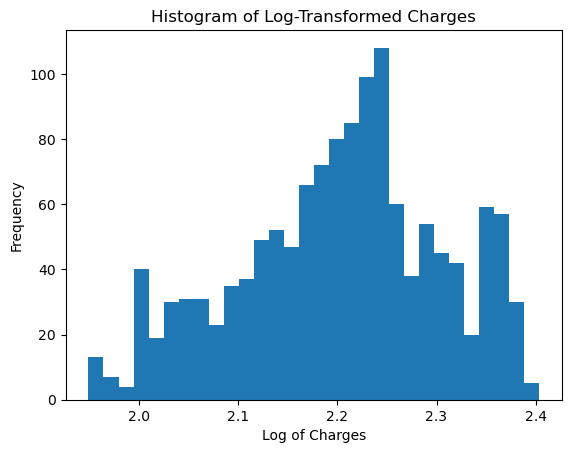

In [230]:
# Since we observed the distribution of the target feature is not normally distributed
# we can apply a logarithmic transformation to the target feature to reduced skewness of the distribution of the target feature

# transform the target feature using a logarithmic transformation
target_vector_log_transformed = np.log(dataset.target)

# plot the distribution of the target feature after applying a logarithmic transformation
plt.hist(
    np.log(target_vector_log_transformed),
    bins=number_of_intervals
)
plt.xlabel('Log of Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Charges')
plt.show()

In [231]:
# segregate the entire dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data,
    target_vector_log_transformed,
    **train_test_split_key_word_arguments
)

# construct a linear regression model
regressor = LinearRegression()
# fit the model to the training data
regressor.fit(X_train, y_train)
# vector of predictions arrived at by the model
y_pred = regressor.predict(X_test)

results = get_performance_results(X_test, y_test)

record_performance('log transform', results, "Apply a logarithmic transformation to the target feature to reduced skewness of the distribution of the target feature")
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     209.3
Date:                Fri, 22 Sep 2023   Prob (F-statistic):          6.05e-109
Time:                        21:24:08   Log-Likelihood:                -183.37
No. Observations:                 335   AIC:                             380.7
Df Residuals:                     328   BIC:                             407.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1949      0.140     51.476      0.0

In [232]:
# Apply a combination of the techniques we have used to improve the model

# construct a multiple linear regression model.
regressor = LinearRegression()
# fit the model to the training data
regressor.fit(X_feature_matrix_excluding_insignificant_features, dataset.target)
# vector of predictions arrived at by the model
y_pred = regressor.predict(X_feature_matrix_excluding_insignificant_features)
# residuals are the difference between the actual values and the predicted values
residuals = dataset.target - y_pred
# standardized residuals are the residuals divided by the standard deviation of the residuals
standardized_residuals = residuals / residuals.std()
# outliers are defined as standardized residuals greater than 3
is_outlier = np.abs(standardized_residuals) > 3
# indices of the outliers
outlier_indices = np.where(is_outlier)[0]
# dataset excluding outliers
data_without_outliers_or_insignificant_features = X_feature_matrix_excluding_insignificant_features.drop(outlier_indices)
# target vector excluding outliers
target_vector_without_outliers = dataset.target.drop(outlier_indices)
# transform the target feature using a logarithmic transformation
target_vector_log_transformed = np.log(target_vector_without_outliers)

# segregate the entire dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data_without_outliers_or_insignificant_features,
    target_vector_log_transformed,
    **train_test_split_key_word_arguments
)

# construct a linear regression model
regressor = LinearRegression()
# fit the model to the training data
regressor.fit(X_train, y_train)
# vector of predictions arrived at by the model
y_pred = regressor.predict(X_test)

results = get_performance_results(X_test, y_test)
# Print the summary of the model
print(results.summary())

record_performance('combo', results, "Combine feature selection, dropping outliers, and log transformation")

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     387.7
Date:                Fri, 22 Sep 2023   Prob (F-statistic):          6.72e-122
Time:                        21:24:08   Log-Likelihood:                -138.09
No. Observations:                 328   AIC:                             286.2
Df Residuals:                     323   BIC:                             305.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9493      0.122     56.805      0.0

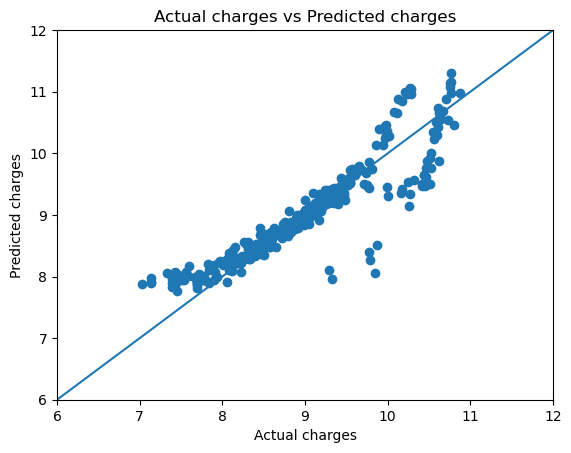

In [233]:
# Now that we have an improved model we can plot the actual values against the predicted values
# We should see a more obvious linear relationship between the actual values and the predicted values

# arbitrary limit for the x and y axis at least as large as the largest value in the dataset
x_axis_limit = y_axis_limit = 12

# visualize how good the predictions are compared to the actual values for the training data
# Observing a linear relationship between the actual values and the predicted values indicates the model is suitable.
plt.scatter(
    y_test,
    y_pred,
)
# (x1, y1) and (x2, y2) are the endpoints of the identity line
x1 = 0
y1 = 0
x2 = x_axis_limit
y2 = y_axis_limit

# plot the identity line to compare the actual values to the predicted values
# Note this **is not the regression line** and is only used to compare the actual values to the predicted values
plt.plot(
    [x1, x2],
    [y1, y2]
)

# Apply non-zero start to zoom in on the plot to apply a better fit of the data points.
x_axis_start = 6
y_axis_start = 6

# range of the x and y axis
x_axis_range = [x_axis_start, x_axis_limit]
y_axis_range = [y_axis_start, y_axis_limit]

# scale the x and y axis to the same range
# to ensure the identity line is not distorted
plt.xlim(x_axis_range)
plt.ylim(y_axis_range)

plt.title("Actual charges vs Predicted charges")
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.show()

In [234]:
# If the model performed well on the training data
# but not as well on the testing data then model might be overfitting the training data

# Although, the model does not appear to be overfitting the training data,
# we get more confidence that the model is not overfitting with cross validation.
# We used a k-fold cross validation technique to tune the hyperparameters already.
# We can use it again with a different goal.

from sklearn.model_selection import KFold

# number of folds to partition the dataset into
number_of_folds = 7

# construct a k-fold cross validation object
kf = KFold(
    n_splits=number_of_folds,
    shuffle=True,
    random_state=seed_to_make_output_deterministic
)
# obtain the indices of the training data and testing data for each fold
indices_to_partition_on = kf.split(dataset.data)

def calculate_r_squared_score_of_fold(train_index, test_index):
    """
    Calculate the mean squared error of the dataset for the current fold.

    Parameters:
        train_index (numpy.ndarray): indices of the training data for the current fold
        test_index (numpy.ndarray): indices of the testing data for the current fold
    
    Returns:
        float: the r squared score
    """
    # extract the training data for the current fold
    # iloc, short for integer location, is used to select rows of the dataframe by index
    X_train, X_test = dataset.data.iloc[train_index], dataset.data.iloc[test_index]
    # extract the testing data for the current fold
    # iloc, short for integer location, is used to select rows of the dataframe by index
    y_train, y_test = dataset.target.iloc[train_index], dataset.target.iloc[test_index]
    # construct a linear regression model
    regressor = LinearRegression()
    # fit the model to the training data
    regressor.fit(X_train, y_train)
    # vector of predictions arrived at by the model
    y_pred = regressor.predict(X_test)
    # calculate the r squared score
    return r2_score(y_test, y_pred)

# threshold for a good r squared value
# somewhat arbitrary value
good_r_squared_value_threshold = 0.7

# mean squared error for each fold
scores = [
    calculate_r_squared_score_of_fold(*indices)
    for indices in indices_to_partition_on
]

# count of folds that performed better than the threshold
count_of_well_performing_folds = sum(
    score > good_r_squared_value_threshold for score in scores
)

print(f'{count_of_well_performing_folds} out of {number_of_folds} folds performed well')

# Its likely safe to say we're not overfitting the training data

6 out of 7 folds performed well


In [235]:
# Pretty print the dataframe using the dictionary keys as the row names and the dictionary values as the column values
orient_frame_with_key_value_pairs_as_rows = 'index'

# Remove the column width constraint so the entire description is displayed instead of being truncated with ellipsis
pd.set_option('display.max_colwidth', None)
# create a dataframe from the dictionary of performance metrics using the dictionary keys as the row names
pd.DataFrame.from_dict(performance_metrics, orient=orient_frame_with_key_value_pairs_as_rows)

,r_squared,adjusted_r_squared,f_statistic,description
no_optimizations,0.798953,0.795275,217.242785,no-op hyperparameter tuning of linear regressor
normalization,0.798953,0.795275,217.242785,Robust scalar to scale the features to have similar ranges of values so features with larger ranges we're not biased towards. Non-guasisan distribution so used RobustScaler instead of StandardScaler.
regularization,0.798953,0.795275,217.242785,Impose a penalty on the number of coefficients to reduce the impact of features that are not useful for prediction. Used Ridge regressor with L2 regularization.
tuning_l2_reg,0.798953,0.795275,217.242785,no-op hyperparameter tuning of the strength of the L2 regularization penalty
feature_selection,0.797070,0.794610,324.044467,Excluded insignificant features sex and region
drop_outliers,0.800641,0.796914,214.859571,Excluded outliers
log transform,0.792924,0.789136,209.326457,Apply a logarithmic transformation to the target feature to reduced skewness of the distribution of the target feature
combo,0.827607,0.825472,387.656905,"Combine feature selection, dropping outliers, and log transformation"


### Null Hypothesis:
> The model has no predictive power.
> More precisely, the coefficients of the independent variables are all equal to zero.

### Sum of Squared Residuals (SSR):
> Statistical measure to quantify the total distance of data points from line fo best fit.
> Calculated as sum of the squared differences between predicted values and actual values. Squaring the differences allows data points with negative differences below the line and data points with positive differences above the line to contribute to a total difference without offsetting each other.
> Measures the amount of variability of the dependent variable that *is not* explained by the independent variables
> SSR = Σ(y - ŷ)²
> such that y is the actual value of the dependent variable and ŷ is the predicted values of the dependent variable

### Total of Sum of Squares (SST):
> Statistical measure of the total deviation of the data points from the mean of the dependent variable.
> Calculated as the sum of the squared differences between actual values of dependent variable and the mean of the dependent variable.
> SST = Σ(y - ȳ)²
> such that y is the actual values of the dependent variable and ȳ is the mean of the dependent variable

### R-squared (R²): 0.825
> Also known as the coefficient of determination.
>
> Statistical measure of the proportion of the variance in the dependent variable that can be explained by the independent variables, i.e. how well the line of best fit fits the data.
>
> R² = 1 - (SSR/SST)
>
> Values range between 0 and 1
>
> Higher values indicate a better ability for the model to explain variability in the dependent variable.
>
> Correlation does not imply causation. We can not infer that a high R² score means the dependent variable is caused by the independent variables. Instead, the score measures the strength of the relationship.
> Outliers have a large influence on the SSR calculation which can lead to a large influence on the R² score.
> R² tends to increase with the increase of sample size despite no improvements with the models predictive power. 
> Models with high R² value are still suspectable to over fitting and including irrelevant features.

### Adjusted R² Score: 0.827
> R² is not sufficient to compare different models because two models with the same score may may include a different number of features. The adjusted R² score penalizes the inclusion of features so simpler models with the same R² score are favored.
> Adjusted R² = 1 - [(1 - R²) * (n - 1) / (n - k - 1)]

### P-value(s): Per feature
> 
> When a p-value is less than 0.05 the independent variable is likely to have a significant effect on the dependent variable.
>
> Determine the statistical significance of **each** coefficient in the model exposing which independent variables have predictive power.
>
> The summary indicates that sex and region are not significant.
>

### F-statistic: 387.66
> A way to summarize in a single metric if the combination of features are significant in predicting the dependent variable.
> 
> Ratio of the mean square regression to the mean square error.
> 
> Ratio of values that represent variability in the dependent variable explained by the independent variables of the model and the variability in the dependent variable not explained by the independent variables in the model respectively.
>
> When the dependent variable is explained by the independent variables it means the model predicts the target variable using the predictors.
>
> When the F-statistic is large and the p-value is small we can reject the null hypothesis and assert the model has predictive power.

### Summary
We are able to reject the null hypothesis that our linear regression model does not have predictive power. In general, a higher R-squared value indicates a better fit of the model to the data and 0.7 or higher is considered for most domains as a good fit. Features such as smoker and age had the highest t-statistics and lowest p-value statistics meaning they were the features with the most predictive power. Sex and region were determined to not be significant. Multiple regression models are highly interpretable because the coefficients precisely indicate which features are significant in predicting the target feature which means we have insight into how the model arrived at a prediction. Although the model has predictive power and the features have a positive correlation with the target feature, we can not say that any given feature causes charges to be a particular value. The strong relationship between the prediction and the features is often misunderstood as a relationship of causation. For example the strong relationship between age and costs suggests an increase in age will coincide with an increase to costs, but does not prove that an increase in age will cause an increase in costs. The increased costs may be caused by a common lifestyle of an aged population or the structure of the insurance plans and not a direct result of age. An argument can be made that reducing body mass index would likely reduce costs and therefore may be the basis for structuring an incentive for healthy lifestyles that reduce bmi. This is just one example of how the information could be used. In addition, the relationship can be used for predictive modeling, informing feature selection, and evaluating the performance of other models.